### This tutorial shows how to produce maps and lightcones with oLIMpus.

In [1]:
import oLIMpus 
import oLIMpus.plotting_module 
import matplotlib.pyplot as plt

Define the size of the box and the number of cells we will want to use. 

In [2]:
Lbox = 50#600
Ncell = 50#150
ZMIN = 5.0 #down to which z we compute the evolution

Set up the Cosmological parameters. 

In [3]:
#set up your parameters here
CosmoParams_input = oLIMpus.Cosmo_Parameters_Input()

#set up the CLASS cosmology
from classy import Class
ClassCosmo = Class()
ClassCosmo.compute()

ClassyCosmo = oLIMpus.runclass(CosmoParams_input) 
print('CLASS has run, we store the cosmology.')

CLASS has run, we store the cosmology.


In [4]:
CosmoParams = oLIMpus.Cosmo_Parameters(CosmoParams_input, ClassyCosmo) 
HMFintclass = oLIMpus.HMF_interpolator(CosmoParams,ClassyCosmo)
print('HMF interpolator built. This ends the cosmology part -- moving to astrophysics.')

HMF interpolator built. This ends the cosmology part -- moving to astrophysics.


Setup Astrophysical parameters. 
We create two dictionaries:
1) zeus21: lognormal approximation of the SFRD includes only linear term, no stochasticity included (orginal zeus21)
2) quad: lognormal approximation of the SFRD includes linear and quadratic terms

In [5]:
#set up your astro parameters too, here the peak of f*(Mh) as an example
AstroParams_zeus21 = oLIMpus.Astro_Parameters(CosmoParams,STOCHASTICITY=False,second_order_SFRD=False)
AstroParams_quad = oLIMpus.Astro_Parameters(CosmoParams,STOCHASTICITY=False,second_order_SFRD=True)

Setup Line parameters. We create two dictionaries:
1) OIII_Yang: OIII using the Yang, Lidz model (arXiv:2409.03997) with no stochasticity
2) Ha_Yang: Halpha using the Yang, Lidz model with no stochasticity

In [ ]:
OIII_Yang_input = oLIMpus.LineParams_Input(\
                 LINE = 'OIII',
                 nu_rest = 6.042e14, 
                 OBSERVABLE_LIM = 'Inu',
                 _R = Lbox/Ncell,
                 LINE_MODEL = 'Yang24',
                 sigma_LSFR = 0.)
OIII_Yang = oLIMpus.Line_Parameters(OIII_Yang_input) 

Ha_Yang_input = oLIMpus.LineParams_Input(\
                 LINE = 'Ha',
                 nu_rest = 4.57e14, 
                 OBSERVABLE_LIM = 'Inu',
                 _R = Lbox/Ncell,
                 LINE_MODEL = 'Yang24',
                 sigma_LSFR = 0.)
Ha_Yang = oLIMpus.Line_Parameters(Ha_Yang_input) 

Ha_Nion_input = oLIMpus.LineParams_Input(\
                 LINE = 'Ha',
                 nu_rest = 4.57e14, 
                 OBSERVABLE_LIM = 'Inu',
                 _R = Lbox/Ncell,
                 LINE_MODEL = 'Nionrate',
                 sigma_LSFR = 0.)
Ha_Nion = oLIMpus.Line_Parameters(Ha_Nion_input) 

Your resolution introduces too large non linear corrections on small scales! 
We use instead MIN_R_NONLINEAR = 2 Mpc
Your resolution introduces too large non linear corrections on small scales! 
We use instead MIN_R_NONLINEAR = 2 Mpc
Your resolution introduces too large non linear corrections on small scales! 
We use instead MIN_R_NONLINEAR = 2 Mpc


## Now the maps.

#### First, we compute the 21cm map with bubbles

The analytical part here considers can be obtained using either the linear or quadratic lognormal appoximation in the SFRD.

In [ ]:
get_z = 7.
seed = 1065
_islice = 0
RSDMODE = 0 

(<Figure size 500x300 with 4 Axes>, <Axes: >)

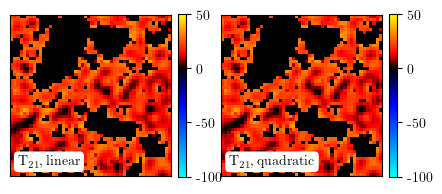

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))

oLIMpus.plotting_module.plot_T21(7.,Lbox,Ncell,seed,0,AstroParams_zeus21,ClassyCosmo, HMFintclass,CosmoParams,ZMIN,_islice,r'${\rm linear}$',ax[0],fig)
oLIMpus.plotting_module.plot_T21(7.,Lbox,Ncell,seed,0,AstroParams_quad,ClassyCosmo, HMFintclass,CosmoParams,ZMIN,_islice,r'${\rm quadratic}$',ax[1],fig)


### Now we compare the analytical and per cell maps for one of the lines.

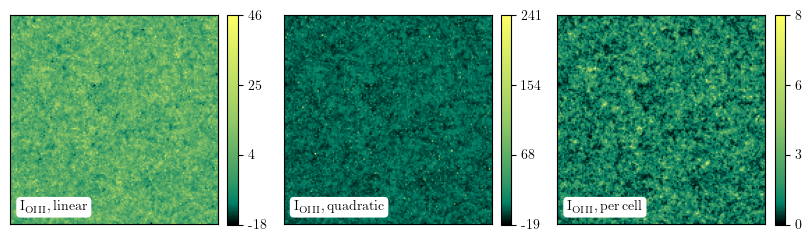

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))

oLIMpus.plotting_module.plot_Inu(7.,Lbox,Ncell,seed,0,True,OIII_Yang,AstroParams_zeus21,ClassyCosmo,HMFintclass,CosmoParams,ZMIN,_islice,r'$\rm linear$',ax[0],fig)
oLIMpus.plotting_module.plot_Inu(7.,Lbox,Ncell,seed,0,True,OIII_Yang,AstroParams_quad,ClassyCosmo,HMFintclass,CosmoParams,ZMIN,_islice,r'$\rm quadratic$',ax[1],fig)
oLIMpus.plotting_module.plot_Inu(7.,Lbox,Ncell,seed,0,False,OIII_Yang,AstroParams_quad,ClassyCosmo,HMFintclass,CosmoParams,ZMIN,_islice,r'$\rm per\,cell$',ax[2],fig)

Doing OIII
0.00010309424587568004 7.473901999919365
Doing Ha
0.00025001355754985854 9.652092893791066


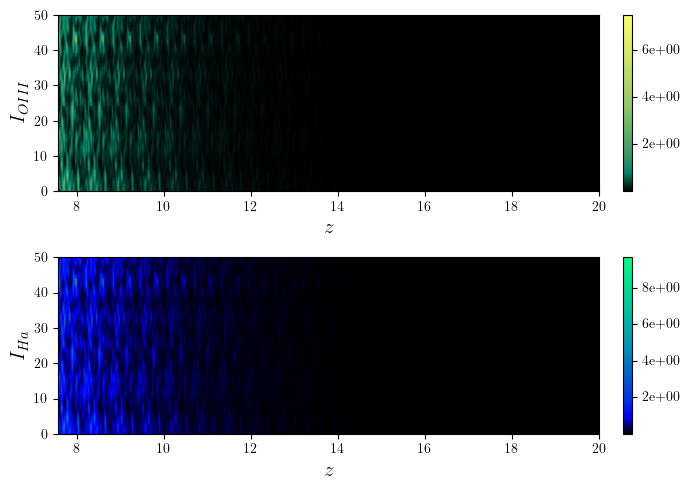

In [10]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(7, 5))

zmin = 6.
zmax = 20.
Npt_z = 10
zvals = oLIMpus.np.linspace(zmax,zmin,Npt_z)[:-1]

print('Doing OIII')
oLIMpus.plotting_module.plot_lightcone('LIM',zvals,Lbox,Ncell,seed,0,False,OIII_Yang,AstroParams_zeus21,ClassyCosmo,HMFintclass,CosmoParams,ZMIN,0,None,ax[0],fig,None)
print('Doing Ha')
oLIMpus.plotting_module.plot_lightcone('LIM',zvals,Lbox,Ncell,seed,0,False,Ha_Yang,AstroParams_zeus21,ClassyCosmo,HMFintclass,CosmoParams,ZMIN,0,None,ax[1],fig,cmap=oLIMpus.plotting_module.LIM_colour_2)


Doing density
Doing SFRD


TypeError: Power_Spectra_LIM.__init__() got multiple values for argument 'RSD_MODE'

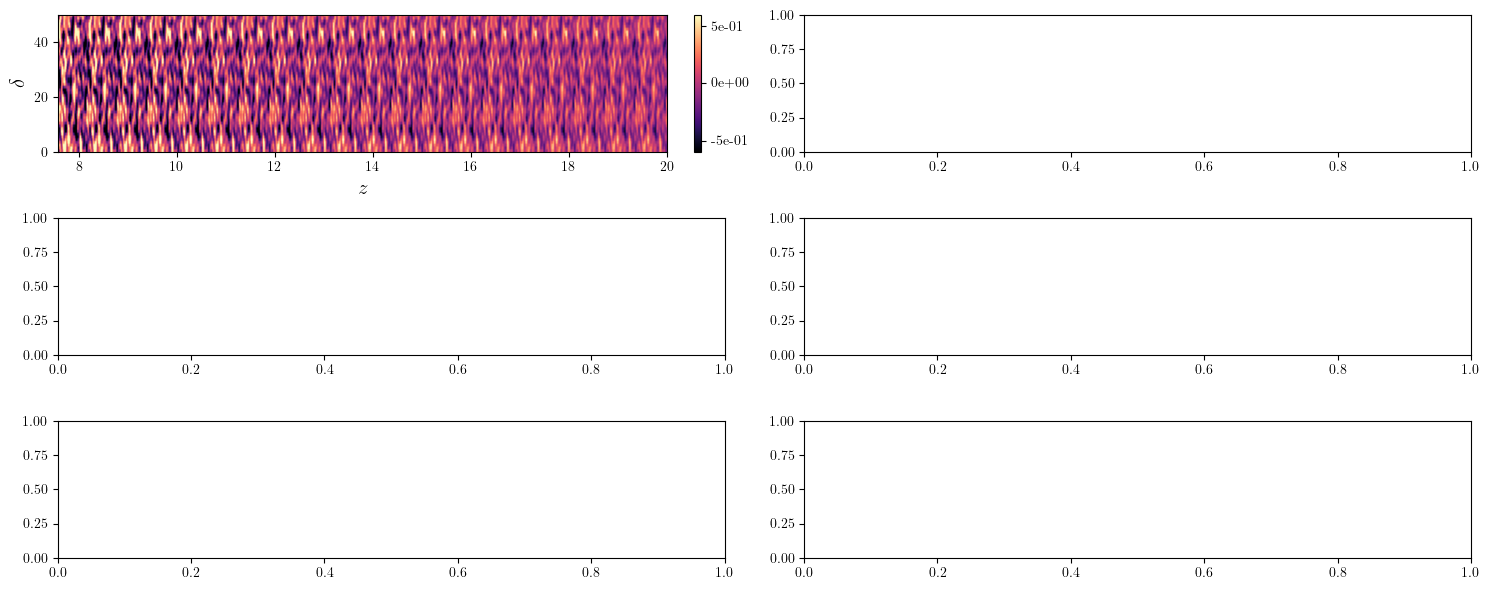

In [9]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 6))

zmin = 6.
zmax = 20.
Npt_z = 10
zvals = oLIMpus.np.linspace(zmax,zmin,Npt_z)[:-1]

print('Doing density')
oLIMpus.plotting_module.plot_lightcone('density',zvals,Lbox,Ncell,seed,0,True,OIII_Yang,AstroParams_zeus21,ClassyCosmo,HMFintclass,CosmoParams,ZMIN,0,None,ax[0,0],fig,None)
print('Doing SFRD')
oLIMpus.plotting_module.plot_lightcone('SFRD',zvals,Lbox,Ncell,seed,0,True,OIII_Yang,AstroParams_zeus21,ClassyCosmo,HMFintclass,CosmoParams,ZMIN,0,None,ax[1,0],fig,None)
print('Doing xHI')
oLIMpus.plotting_module.plot_lightcone('xHI',zvals,Lbox,Ncell,seed,0,True,OIII_Yang,AstroParams_zeus21,ClassyCosmo,HMFintclass,CosmoParams,ZMIN,0,None,ax[2,0],fig,None)
print('Doing T21')
oLIMpus.plotting_module.plot_lightcone('T21',zvals,Lbox,Ncell,seed,0,True,OIII_Yang,AstroParams_zeus21,ClassyCosmo,HMFintclass,CosmoParams,ZMIN,0,None,ax[2,1],fig,None)
print('Doing OIII')
oLIMpus.plotting_module.plot_lightcone('LIM',zvals,Lbox,Ncell,seed,0,True,OIII_Yang,AstroParams_zeus21,ClassyCosmo,HMFintclass,CosmoParams,ZMIN,0,None,ax[0,1],fig,None)
print('Doing Ha')
oLIMpus.plotting_module.plot_lightcone('LIM',zvals,Lbox,Ncell,seed,0,True,Ha_Yang,AstroParams_zeus21,ClassyCosmo,HMFintclass,CosmoParams,ZMIN,0,None,ax[1,1],fig,cmap=oLIMpus.plotting_module.LIM_colour_2)
